In [52]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt

In [53]:
pip install xlrd

Reading Data

In [54]:
file_path = ('C:\\Users\\Seijsener\\Ironhack\\unit4\\week_10\\mid_bootcamp_project_regression\\regression_data (1).xls')

In [55]:
df = pd.read_excel(file_path)

In [56]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [57]:
df.shape

(21597, 21)

The data contains 21 different independent variables like bedrooms, sqft_living, view, grade, etc and the dependent variable is price. The data contains 21597 observations.

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales, using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.

Veiwing the data and take a look at the structure and summary statistics of the data

In [58]:
print(df.head())

           id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqf

In [59]:
print(df.tail())

               id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
21592   263000018 2014-05-21         3       2.50         1530      1131   
21593  6600060120 2015-02-23         4       2.50         2310      5813   
21594  1523300141 2014-06-23         2       0.75         1020      1350   
21595   291310100 2015-01-16         3       2.50         1600      2388   
21596  1523300157 2014-10-15         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \

In [60]:
print(df.describe())

                 id                           date      bedrooms  \
count  2.159700e+04                          21597  21597.000000   
mean   4.580474e+09  2014-10-29 04:20:38.171968512      3.373200   
min    1.000102e+06            2014-05-02 00:00:00      1.000000   
25%    2.123049e+09            2014-07-22 00:00:00      3.000000   
50%    3.904930e+09            2014-10-16 00:00:00      3.000000   
75%    7.308900e+09            2015-02-17 00:00:00      4.000000   
max    9.900000e+09            2015-05-27 00:00:00     33.000000   
std    2.876736e+09                            NaN      0.926299   

          bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count  21597.000000  21597.000000  2.159700e+04  21597.000000  21597.000000   
mean       2.115826   2080.321850  1.509941e+04      1.494096      0.007547   
min        0.500000    370.000000  5.200000e+02      1.000000      0.000000   
25%        1.750000   1430.000000  5.040000e+03      1.000000      0.00

In [61]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

Now we check for the missing values in the data.

In [63]:
null_counts = df.isnull().sum()
print(null_counts)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


In [64]:
nan_counts = df.isna().sum()
print(nan_counts)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


We see that there are no missing values in this data

In [65]:
df.drop_duplicates()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


DIVIDING THE DATA INTO TRAIN AND TEST DATA

In [66]:
seed = 123 # setting the seed to ensure we always get the samme random trainand test dataset

X_train, X_test = train_test_split(df, test_size=0.2, random_state=seed)
train = X_train
test = X_test

EXPLORATORY DATA ANALYSIS ON THE TRAIN DATA

In [67]:
#Determining the association between variables.

In [68]:
#computing the correlation matrix between the variables and visualizing it using the seaborn library for correlation heatmap:

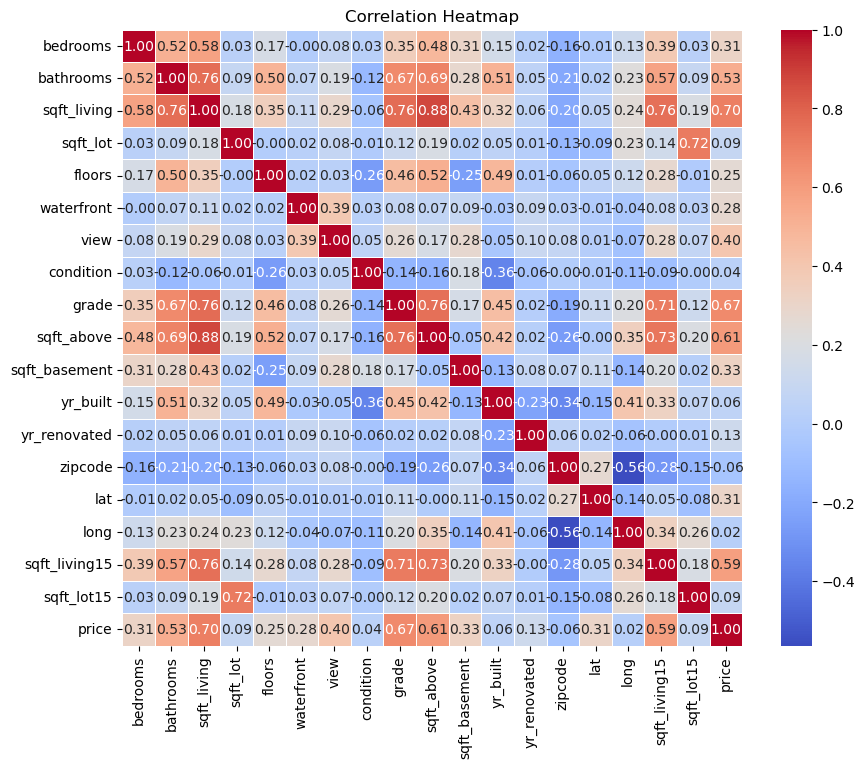

In [69]:
cor_data = train.iloc[:, 2:21]

correlation = cor_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

According to our corrplot (price) is positively correlated with bedroom, bathroom, Sqft_living, view , grade, sqft_above, sqft_basement, lat, sqft_living 15

Now we will draw some scatter plots to determine the relationship between these variables.

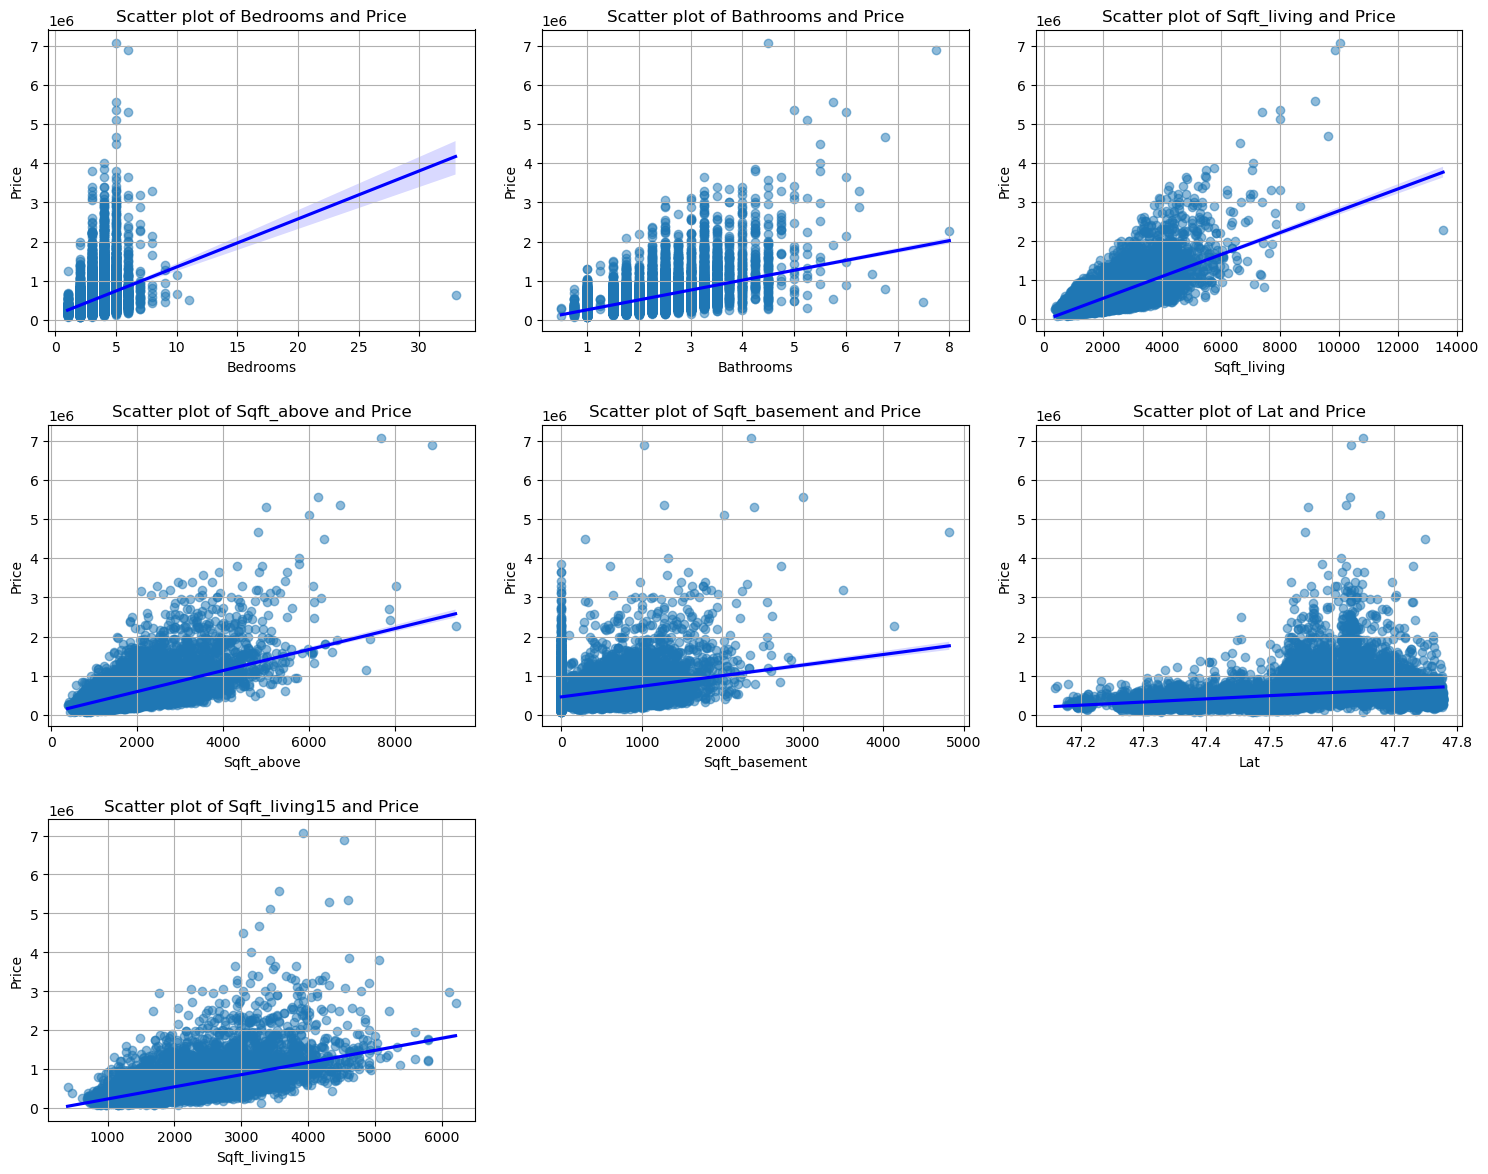

In [70]:
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']

plt.figure(figsize=(15, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.regplot(data=train, x=var, y='price', scatter_kws={"alpha":0.5}, line_kws={"color": "blue"})
    plt.title(f'Scatter plot of {var.capitalize()} and Price')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')
    plt.grid(True)

plt.tight_layout()
plt.show()

Based on the scatter plots with linear regression lines, it appears that the relationship between price and the variables bedrooms, bathrooms, sqft_living, sqft_above, sqft_basement, lat, and sqft_living15 is approximately linear. This conclusion is drawn from the observation that the data points roughly follow a straight line trend in each scatter plot, and the linear regression lines fit the data reasonably well.

For the two categorical variables(view and grade) we draw boxplots to understand the relationship

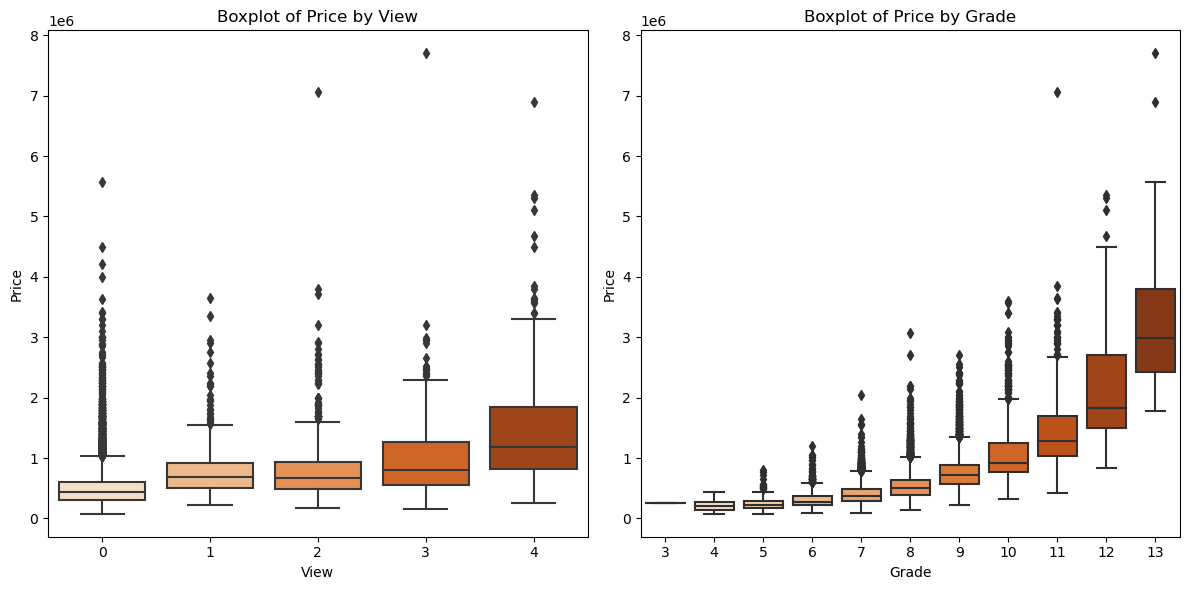

In [94]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='view', y='price', data=df, palette='Oranges')
plt.title('Boxplot of Price by View')
plt.xlabel('View')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.boxplot(x='grade', y='price', data=df, palette='Oranges')
plt.title('Boxplot of Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

Based on the boxplots of price by view and grade, it seems there is indeed a relationship between price and the categorical variables view and grade:

1.View: The boxplot of price by view indicates that properties with higher view ratings tend to have higher prices. This suggests that there may be a positive association between the view rating of a property and its price.

2.Grade: Similarly, the boxplot of price by grade shows that properties with higher grades tend to have higher prices. This suggests that there may be a positive association between the grade of a property and its price.

These observations align with common intuition in real estate, where properties with better views or higher grades (indicative of better quality and construction) often command higher prices.

These visualizations provide valuable insights into the relationship between the categorical variables (view and grade) and the target variable (price), which can be further explored and analyzed in more detail if needed.

Modifyig the data.

Now we modify the train data a liitle and add two new columns for our better understanding. I feel price might have a fair chance of depending on the age of the house and also the number of times it has been renovated. So we try to extact the age and the number of times a particular house has been renovated from our train data

In [72]:
df['date'] = pd.to_datetime(df['date'])

# Calculate the age of the house
df['age'] = df['date'].dt.year - df['yr_built']

# Convert yr_renovated to a binary variable indicating whether the house has been renovated or not
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

using the pair plot.
to generate a pair plot showing the pairwise relationships between the selected columns. 

C:\Users\Seijsener\.conda\New folderX\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


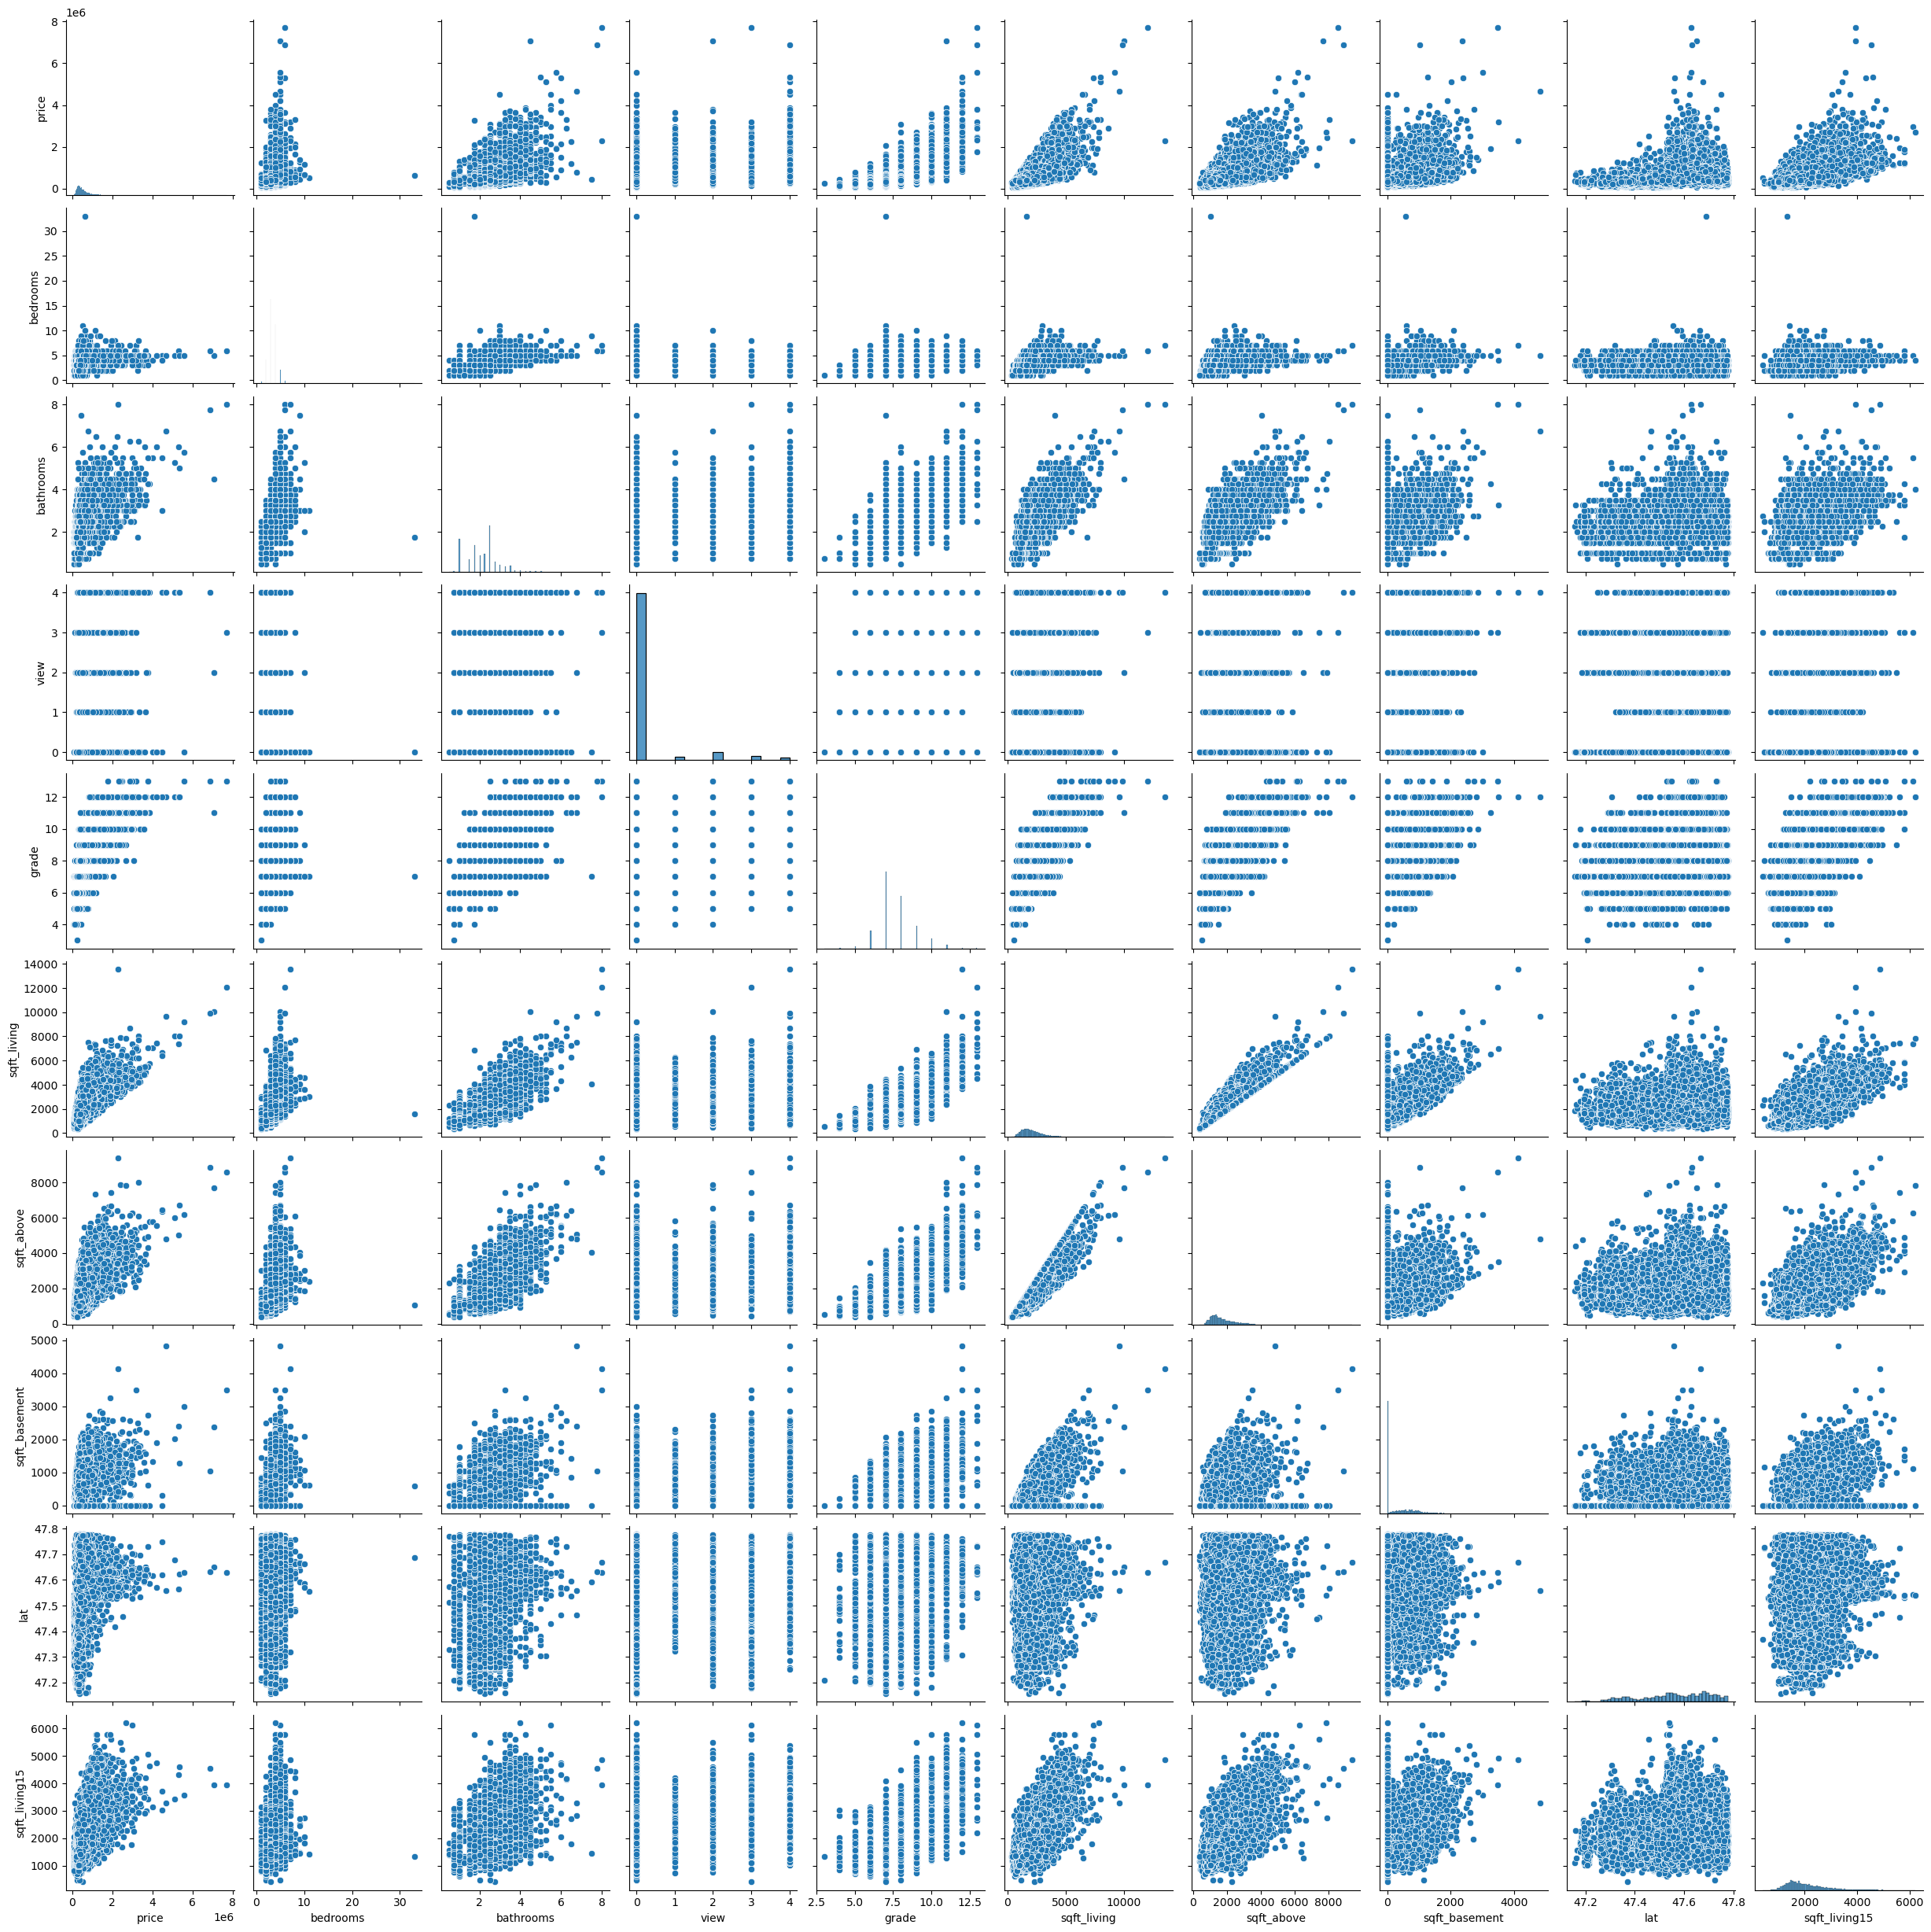

In [73]:
columns = ["price", "bedrooms", "bathrooms", "view", "grade", "sqft_living", "sqft_above", "sqft_basement", "lat", "sqft_living15"]

sns.pairplot(df[columns])
plt.show()

create a boxplot to check for outliers in the dependent variable (price) using the bedrooms variable.

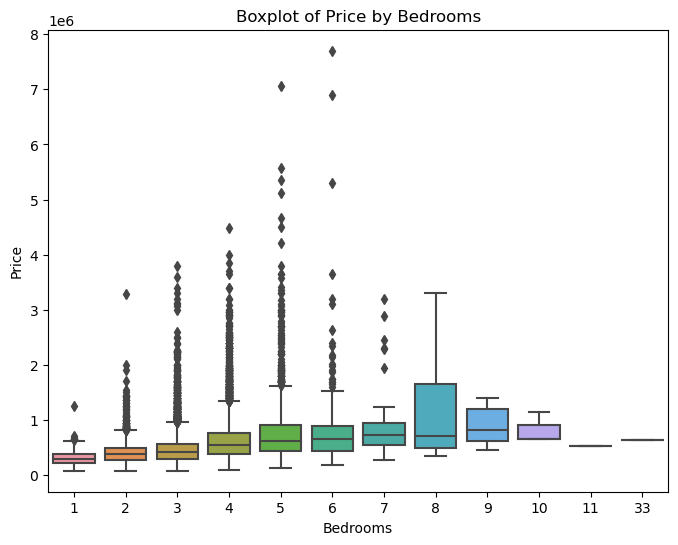

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Boxplot of Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

we see that we have a significantly large number of outliers.

Treating or altering the outlier/extreme values in genuine observations is not a standard operating procedure. However, it is essential to understand their impact on our predictive models. To better understand the implications of outliers better, We are going to compare the fit of a simple linear regression model on the dataset with and without outliers. For this we first extract outliers from the data and then obtain the data without the outliers.

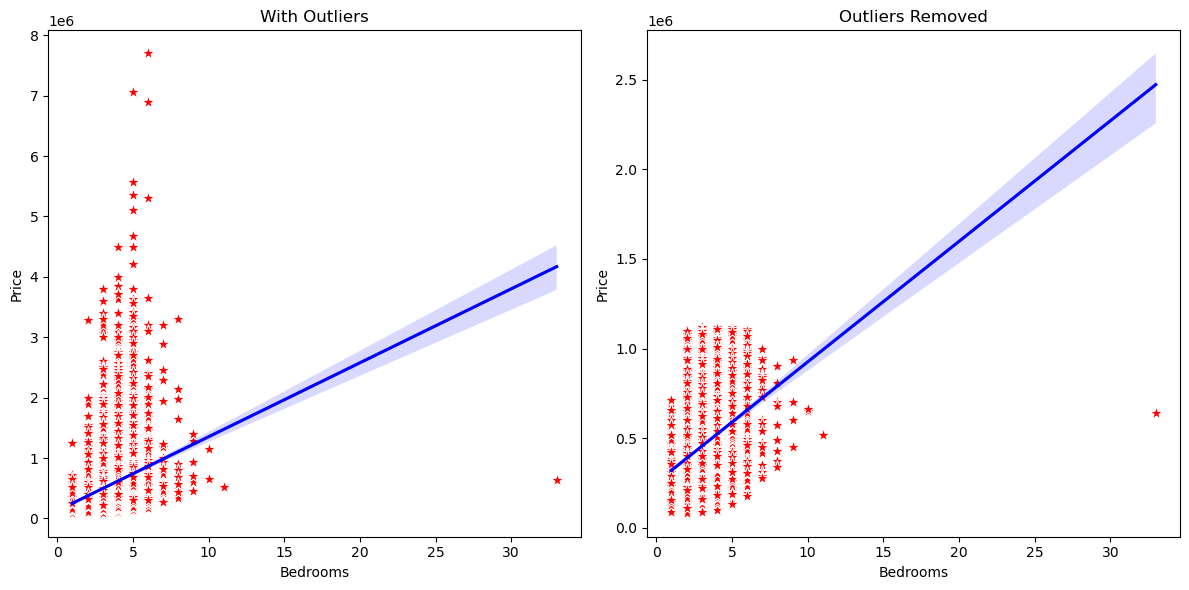

In [75]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

outliers_data = df[df['price'].isin(outliers['price'])]

df_no_outliers = df[~df['price'].isin(outliers['price'])]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='bedrooms', y='price', data=df, color='red', marker='*', s=100)
sns.regplot(x='bedrooms', y='price', data=df, scatter=False, color='blue')
plt.title('With Outliers')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='bedrooms', y='price', data=df_no_outliers, color='red', marker='*', s=100)
sns.regplot(x='bedrooms', y='price', data=df_no_outliers, scatter=False, color='blue')
plt.title('Outliers Removed')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

Notice the change in slope of the best fit line after removing the outliers. It is evident that if we remove the outliers to train the model, our predictions would be exagerated (high error) for larger values of price because of the larger slope.

So we continue with the entire data

MODELING 1.Modeling on the entire train data.

Price,bedroom, bathroom, Sqft_living, view , grade, sqft_above, sqft_basement, lat, and sqft_living 15 were considered for the full model based on the corrplot.

A linear model was fit to determine the relationship. The results are shown below.

In [77]:
import statsmodels.api as sm

In [78]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']]
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4263.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:18:41   Log-Likelihood:            -2.9802e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21589   BIC:                         5.961e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.846e+05   1.47e+04    -33.041

As concluded from the adjusted R-squared value of 0.580, the relationship beween these variables appear to be quite strong

Now we detect the influential points of the data

Declaring an observation as an outlier based on a just one (rather unimportant) feature could lead to unrealistic inferences. When you have to decide if an individual entity (represented by row or observation) is an extreme value or not, it is better to collectively consider the features (X’s) that matter. We find it out using the cook’s distance

In [79]:
from statsmodels.stats.outliers_influence import OLSInfluence

model = sm.OLS(y, X).fit()

influence = OLSInfluence(model)
cooksd = influence.cooks_distance

mean_cooksd = cooksd[0].mean()

print("Mean Cook's distance:", mean_cooksd)

Mean Cook's distance: 0.00015823116797601704


In simple terms, Cook's distance tells you how much the predicted values of the model would change if a particular observation were removed from the dataset. High values of Cook's distance indicate that the corresponding observation has a high influence on the model fit. These observations may be potential outliers or influential points that can significantly affect the results of the regression analysis.

Now we plot the cooks distance

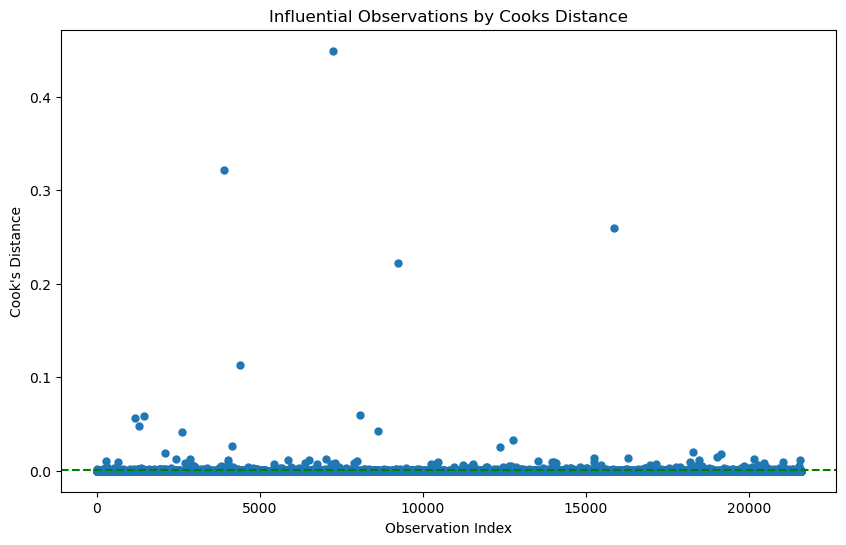

             id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
21   2524049179 2014-08-26         3       2.75         3050     44867   
239  5152100060 2014-05-29         6       2.50         4410     14034   
246  2025069065 2014-09-29         4       2.50         3650      8354   
269  7960900060 2015-05-04         4       3.25         5050     20100   
282  7424700045 2015-05-13         5       3.00         3830      8480   

     floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
21      1.0           0     4          3  ...            720      1968   
239     1.0           0     2          4  ...           2060      1965   
246     1.0           1     4          3  ...           1820      2000   
269     1.5           0     2          3  ...            300      1982   
282     2.0           0     1          5  ...           1200      1905   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
21              0    98040  47.5316

In [95]:
model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooksd = influence.cooks_distance[0]

# Mean Cook's distance
mean_cooksd = np.mean(cooksd)

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.plot(cooksd, 'o', markersize=5)
plt.axhline(4 * mean_cooksd, color='green', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title('Influential Observations by Cooks Distance')
plt.show()

# Find influential points
influential = np.where(cooksd > 4 * mean_cooksd)[0]
df_influential = df.iloc[influential]
print(df_influential.head())

we find out the influential points in the data.

In [96]:
influential_data = df.iloc[influential]

Now we take out the influential outliers

In [99]:
influential_outliers = pd.merge(outliers_data, influential_data, on=["id", "date", "price", "bedrooms", "bathrooms", "sqft_living",
"sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above",
"sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long",
"sqft_living15", "sqft_lot15", "age"])

Now we modify the data excluding the outliers and including only the influential outliers

In [101]:
df1 = pd.concat([df, influential_outliers], ignore_index=True)

modelling using the train data which includes influential_outliers

In [102]:
X_train = df1[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_lot', 'age', 'floors', 'waterfront']]

y_train = df1['price']

X_train = sm.add_constant(X_train)

model3 = sm.OLS(y_train, X_train).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     5890.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:18:51   Log-Likelihood:            -3.0991e+05
No. Observations:               22257   AIC:                         6.198e+05
Df Residuals:                   22247   BIC:                         6.199e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.129e+06   1.86e+04    -60.751      

We can see the relationship beween these variables appear to be moderately strong as shown by R-Suared value and the probability.

We also try fitting the model including a few other variables which we left out in while fitting the model when we took the entire data and stop at a model which gives us the maximum R-squared value

In [132]:
test['age_squared'] = test['age'] ** 2

test_features = test[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'age', 
                      'waterfront', 'long', 'lat', 'zipcode', 'condition', 'sqft_above', 
                      'sqft_living15', 'yr_renovated', 'age_squared']]


test_features = sm.add_constant(test_features)

pred_test = model4.predict(test_features)

print(pred_test)


21569    1.841856e+05
2514     1.426013e+06
16062    3.635891e+04
1906     3.892111e+05
17226    1.051917e+06
             ...     
2686     4.939150e+05
11906    4.499774e+05
13458    1.003519e+06
4135     4.103416e+05
3584     7.391627e+05
Length: 4320, dtype: float64


In [106]:
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'age', 'waterfront', 
             'long', 'lat', 'zipcode', 'condition', 'sqft_above', 'sqft_living15', 'yr_renovated']

X = sm.add_constant(df1[variables])

model4 = sm.OLS(df1['price'], X).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     4415.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:47:15   Log-Likelihood:            -3.0868e+05
No. Observations:               22257   AIC:                         6.174e+05
Df Residuals:                   22242   BIC:                         6.175e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.779e+06   3.53e+06      2.773

As concluded from the adjusted R-squared value of 0.735, the relationship beween these variables appear to be quite strong

In [133]:
test_features = test[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'age', 
                      'waterfront', 'long', 'lat', 'zipcode', 'condition', 'sqft_above', 
                      'sqft_living15', 'yr_renovated', 'age_squared']]

test_features = sm.add_constant(test_features)

pred_test = model4.predict(test_features)

print(pred_test)


21569    1.841856e+05
2514     1.426013e+06
16062    3.635891e+04
1906     3.892111e+05
17226    1.051917e+06
             ...     
2686     4.939150e+05
11906    4.499774e+05
13458    1.003519e+06
4135     4.103416e+05
3584     7.391627e+05
Length: 4320, dtype: float64


ACCURACY OF THE MODEL ON THE TRAIN DATA

In [126]:
pred = model4.predict(X)

tally_table = pd.DataFrame({'actual': df1['price'], 'predicted': pred})

mape = np.mean(np.abs(tally_table['actual'] - tally_table['predicted']) / tally_table['actual'])

accuracy = 1 - mape
print(accuracy)

0.688890407861108


In [127]:
print("The accuracy is:", accuracy)

The accuracy is: 0.688890407861108


We see that the accuracy is 68.88%.

PREDICTION ON THE TEST DATA

In [134]:
tally_table_1 = pd.DataFrame({'actual': test['price'], 'predicted': pred_test})

mape_test = np.mean(np.abs(tally_table_1['actual'] - tally_table_1['predicted']) / tally_table_1['actual'])

accuracy_test = 1 - mape_test
print("Accuracy on test data:", accuracy_test)

Accuracy on test data: 0.685219854885353


we see that the accuracy is 68.52%.

Thus our model can predict price with an accuracy of 68.52%.